In [4]:
# ⚙️ Install dependencies (safe to re-run in notebooks)
!pip install yfinance pandas numpy matplotlib seaborn statsmodels --quiet


# 📊 Time Series Data Exploration for TSLA, BND, and SPY

This notebook performs time series data collection, cleaning, and exploratory analysis for three key financial assets:
- **TSLA**: High-growth stock
- **BND**: Stable bond ETF
- **SPY**: Broad-market S&P 500 ETF

We use data from Yahoo Finance and analyze trends, volatility, stationarity, and risk metrics.


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

plt.style.use('seaborn-v0_8-darkgrid')


## 📅 Configuration

We define our tickers and date range for data collection.


In [6]:
tickers = ['TSLA', 'BND', 'SPY']
start = '2015-07-01'
end = '2025-07-31'


## 📥 Data Loading

We fetch historical stock data using `yfinance` for each asset. We also ensure any missing data is forward-filled.


In [7]:
all_data = {}

for ticker in tickers:
    print(f"Downloading {ticker}...")
    df = yf.download(ticker, start=start, end=end, auto_adjust=False)
    df.ffill(inplace=True)
    df['Ticker'] = ticker
    all_data[ticker] = df


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


## 🧩 Combine DataFrames

We'll stack them vertically using `concat()` for easier access.


In [8]:
combined_df = pd.concat(all_data.values(), axis=0)
combined_df.index.name = 'Date'
combined_df.head()


Price,Adj Close,Close,High,Low,Open,Volume,Ticker,Adj Close,Close,High,Low,Open,Volume,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,BND,BND,BND,BND,BND,BND,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,,,,,,,,,,,,,,
2015-07-01,17.943333,17.943333,18.174667,17.856667,18.073999,31518000.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,18.667999,18.667999,18.830000,18.220667,18.680000,107458500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-06,18.648001,18.648001,18.779333,18.420000,18.591999,61828500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-07,17.858667,17.858667,18.346666,17.384666,18.333332,91576500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-08,16.997334,16.997334,17.386667,16.954000,17.288000,93316500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 🔍 Individual Ticker Analysis

Loop through each ticker to explore basic statistics, returns, volatility, and run the Augmented Dickey-Fuller test to assess stationarity.



=== TSLA ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  2535 non-null   float64
 1   (Close, TSLA)      2535 non-null   float64
 2   (High, TSLA)       2535 non-null   float64
 3   (Low, TSLA)        2535 non-null   float64
 4   (Open, TSLA)       2535 non-null   float64
 5   (Volume, TSLA)     2535 non-null   int64  
 6   (Ticker, )         2535 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 158.4+ KB


None

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,131.963002,131.963002,134.960429,128.837831,132.000600,1.141789e+08
std,120.914904,120.914904,123.783736,117.996631,121.034152,7.332146e+07
min,9.578000,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,18.967667,18.967667,19.279667,18.575334,18.901000,6.908220e+07
50%,94.571335,94.571335,97.666664,91.734001,94.400665,9.537450e+07
75%,236.761665,236.761665,240.881668,232.170006,235.851669,1.322551e+08
max,479.859985,479.859985,488.540009,457.510010,475.899994,9.140820e+08


Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
Ticker               0
dtype: int64

ADF Test for TSLA:
ADF Statistic: -1.4189
p-value: 0.5732
✘ Non-stationary


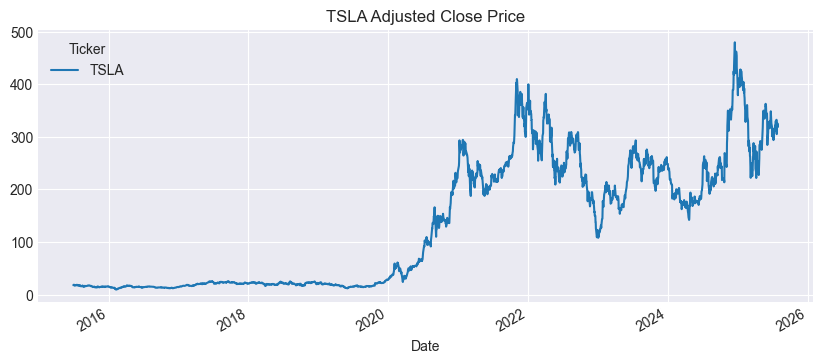

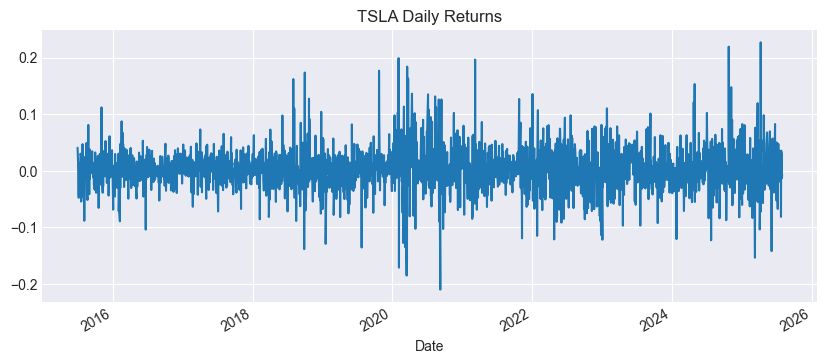

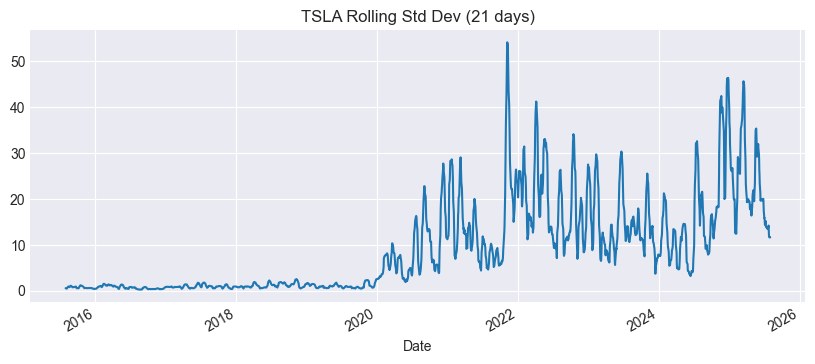

📉 95% Value at Risk (VaR): -0.0547
📈 Sharpe Ratio: 0.7783

=== BND ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, BND)  2535 non-null   float64
 1   (Close, BND)      2535 non-null   float64
 2   (High, BND)       2535 non-null   float64
 3   (Low, BND)        2535 non-null   float64
 4   (Open, BND)       2535 non-null   float64
 5   (Volume, BND)     2535 non-null   int64  
 6   (Ticker, )        2535 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 158.4+ KB


None

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BND,BND,BND,BND,BND,BND
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,68.469189,79.644994,79.761641,79.525704,79.647633,4.434376e+06
std,4.554602,5.370225,5.353468,5.386081,5.372925,2.899511e+06
min,60.779144,68.040001,68.379997,67.989998,68.080002,0.000000e+00
25%,64.654350,73.800003,73.919998,73.610001,73.795002,2.182050e+06
50%,67.604881,81.029999,81.120003,80.930000,81.010002,4.121100e+06
75%,71.891136,83.945000,84.070000,83.849998,83.930000,5.890100e+06
max,77.318260,89.480003,89.589996,89.440002,89.550003,3.396300e+07


Price      Ticker
Adj Close  BND       0
Close      BND       0
High       BND       0
Low        BND       0
Open       BND       0
Volume     BND       0
Ticker               0
dtype: int64

ADF Test for BND:
ADF Statistic: -1.5363
p-value: 0.5155
✘ Non-stationary


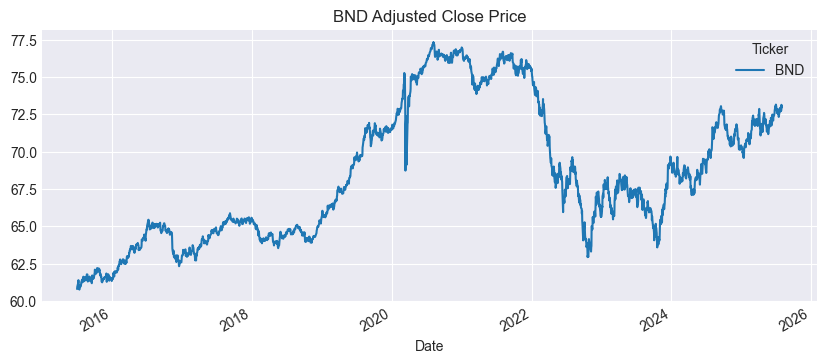

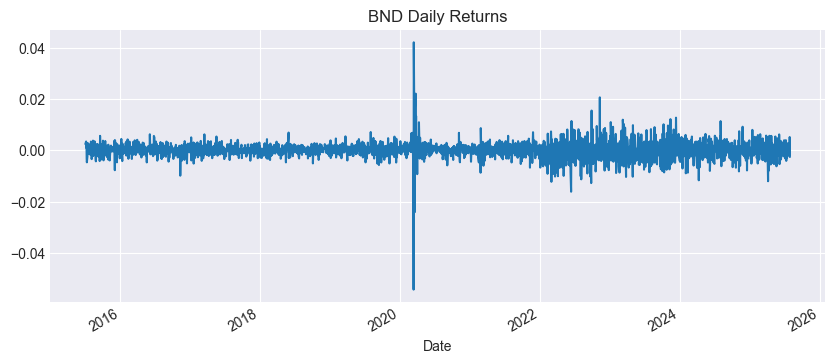

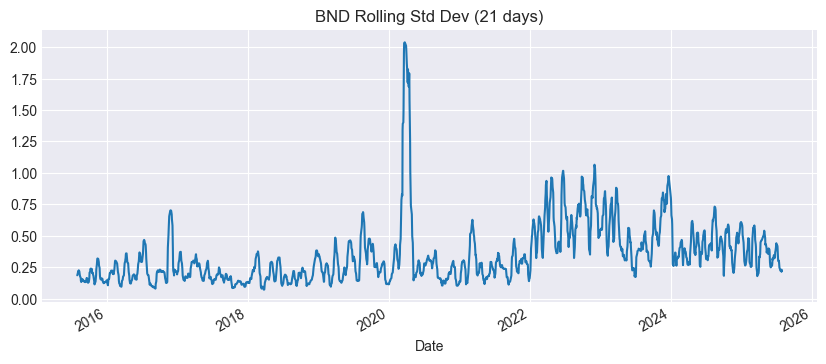

📉 95% Value at Risk (VaR): -0.0049
📈 Sharpe Ratio: 0.3569

=== SPY ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, SPY)  2535 non-null   float64
 1   (Close, SPY)      2535 non-null   float64
 2   (High, SPY)       2535 non-null   float64
 3   (Low, SPY)        2535 non-null   float64
 4   (Open, SPY)       2535 non-null   float64
 5   (Volume, SPY)     2535 non-null   int64  
 6   (Ticker, )        2535 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 158.4+ KB


None

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,334.193732,355.426505,357.322560,353.221996,355.355124,8.503521e+07
std,126.427705,118.237179,118.814524,117.527628,118.205366,4.428796e+07
min,155.869797,182.860001,184.100006,181.020004,182.339996,2.027000e+07
25%,230.083183,258.535004,260.175003,256.934998,257.940002,5.779150e+07
50%,305.264435,328.730011,330.059998,326.399994,328.279999,7.451530e+07
75%,420.350479,438.084991,440.929993,435.679993,438.104996,9.789180e+07
max,637.099976,637.099976,638.669983,635.539978,638.349976,5.072443e+08


Price      Ticker
Adj Close  SPY       0
Close      SPY       0
High       SPY       0
Low        SPY       0
Open       SPY       0
Volume     SPY       0
Ticker               0
dtype: int64

ADF Test for SPY:
ADF Statistic: 0.6908
p-value: 0.9897
✘ Non-stationary


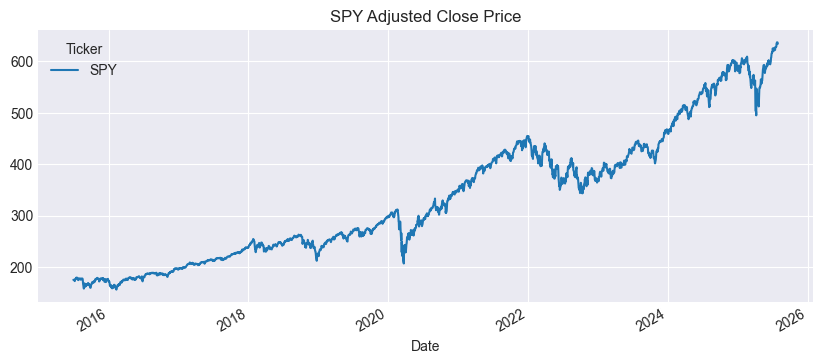

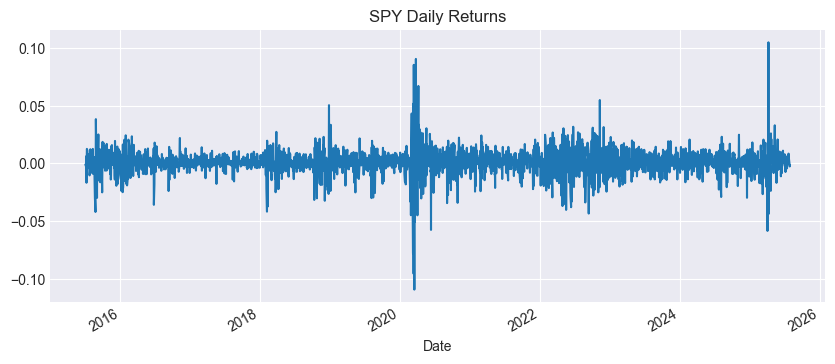

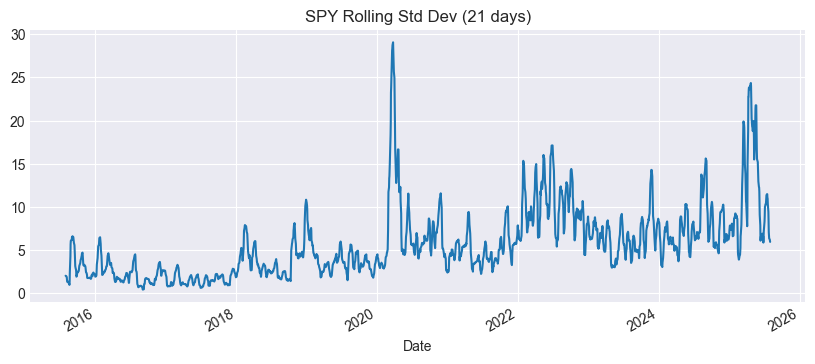

📉 95% Value at Risk (VaR): -0.0172
📈 Sharpe Ratio: 0.7941


In [9]:
for ticker in tickers:
    print(f"\n=== {ticker} ===")
    df = all_data[ticker].copy()
    
    # Info and stats
    display(df.info())
    display(df.describe())
    display(df.isnull().sum())

    # Returns and Rolling Volatility
    df['Daily Return'] = df['Adj Close'].pct_change()
    df['Rolling Mean'] = df['Adj Close'].rolling(window=21).mean()
    df['Rolling Std'] = df['Adj Close'].rolling(window=21).std()

    # ADF test
    print(f"ADF Test for {ticker}:")
    result = adfuller(df['Adj Close'].dropna())
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("✔ Stationary" if result[1] < 0.05 else "✘ Non-stationary")

    # Plot prices
    df['Adj Close'].plot(figsize=(10, 4), title=f"{ticker} Adjusted Close Price")
    plt.show()

    # Plot returns
    df['Daily Return'].plot(figsize=(10, 4), title=f"{ticker} Daily Returns")
    plt.show()

    # Plot rolling volatility
    df['Rolling Std'].plot(figsize=(10, 4), title=f"{ticker} Rolling Std Dev (21 days)")
    plt.show()

    # Risk Metrics
    var_95 = np.percentile(df['Daily Return'].dropna(), 5)
    sharpe = (df['Daily Return'].mean() / df['Daily Return'].std()) * np.sqrt(252)
    print(f"📉 95% Value at Risk (VaR): {var_95:.4f}")
    print(f"📈 Sharpe Ratio: {sharpe:.4f}")


SPY: 15 outlier days with >5% daily return


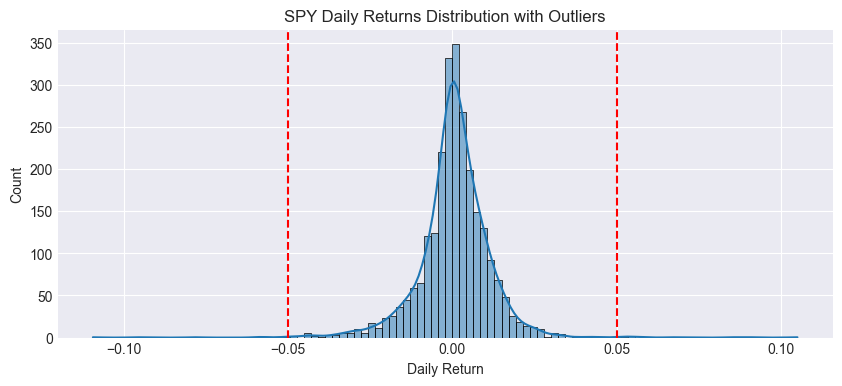

In [10]:
# Outlier detection for daily returns
threshold = 0.05  # 5% change
outliers = df[np.abs(df['Daily Return']) > threshold]
print(f"{ticker}: {len(outliers)} outlier days with >5% daily return")

# Plot them
plt.figure(figsize=(10,4))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True)
plt.axvline(threshold, color='r', linestyle='--')
plt.axvline(-threshold, color='r', linestyle='--')
plt.title(f"{ticker} Daily Returns Distribution with Outliers")
plt.show()
